<a href="https://colab.research.google.com/github/BOLLOJUAISHWARYA/Google-collab-ANN/blob/main/alldatasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# To train the model with more data and see the changes in loss this model was built 


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
dataset = pd.read_excel('Folds5x2_pp.xlsx',None)

In [ ]:
type(dataset)

dict

We can see that type is dict as we have read data from all sheets

In the below command we are concatenating the data from all sheets to dataframe by using the for 

In [ ]:
df=pd.concat(dataset[frame] for frame in dataset.keys())

In [ ]:
X = df.iloc[:,:-1].values
Y = df.iloc[:,-1].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

KerasClassifier wrapper can take arguments, We can use these arguments to further customize the construction of the model.

Importing Gridsearch for hyperparameter tuning to get best parameters for our model. 

In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
def create_model( opt='Adam', loss='loss',learn_rate=0.01):
      
    model = tf.keras.models.Sequential()
    
    model.add(tf.keras.layers.Dense(units=12, activation='relu'))
    model.add(tf.keras.layers.Dense(1, activation='sigmoid')) 
    model.compile(loss=loss, optimizer=opt, metrics='root_mean_squared_error')
    
    return model


model = KerasClassifier(build_fn=create_model, epochs=50, batch_size=32, verbose=0)

# define the grid search parameters
optimizer = ['SGD', 'RMSprop', 'Adam']
learn_rate = [ 0.01, 0.1]
loss=['mean_squared_error','mean_absolute_error','mean_absolute_percentage_error']

param_grid = dict(learn_rate=learn_rate,opt=optimizer,loss=loss)

# search the grid
grid = GridSearchCV(estimator=model, param_grid=param_grid, verbose=2)
grid_result = grid.fit(X_train, Y_train)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  if sys.path[0] == '':


Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] END ..learn_rate=0.01, loss=mean_squared_error, opt=SGD; total time=   0.2s
[CV] END ..learn_rate=0.01, loss=mean_squared_error, opt=SGD; total time=   0.2s
[CV] END ..learn_rate=0.01, loss=mean_squared_error, opt=SGD; total time=   0.2s
[CV] END ..learn_rate=0.01, loss=mean_squared_error, opt=SGD; total time=   0.2s
[CV] END ..learn_rate=0.01, loss=mean_squared_error, opt=SGD; total time=   0.2s
[CV] END learn_rate=0.01, loss=mean_squared_error, opt=RMSprop; total time=   0.2s
[CV] END learn_rate=0.01, loss=mean_squared_error, opt=RMSprop; total time=   0.3s
[CV] END learn_rate=0.01, loss=mean_squared_error, opt=RMSprop; total time=   0.2s
[CV] END learn_rate=0.01, loss=mean_squared_error, opt=RMSprop; total time=   0.2s
[CV] END learn_rate=0.01, loss=mean_squared_error, opt=RMSprop; total time=   0.2s
[CV] END .learn_rate=0.01, loss=mean_squared_error, opt=Adam; total time=   0.2s
[CV] END .learn_rate=0.01, loss=mean_s

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
90 fits failed out of a total of 90.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
90 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/keras/wrappers/scikit_learn.py", line 236, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/keras/wrappers/scikit_learn.py", line 164, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/usr/loca

ValueError: ignored

In [ ]:
best_params=grid_result.best_params_
accuracy=grid_result.best_score_

print(best_params,accuracy)

To build the model from above parameters but unfortunately there was some error so built a normal model.

In [ ]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))
ann.add(tf.keras.layers.Dense(units=1))
ann.compile(optimizer = 'adam', loss = 'mean_squared_error')
model=ann.fit(X_train, Y_train,validation_split=0.3, batch_size = 32, epochs = 150)

Epoch 1/150
838/838 [==============================] - 2s 2ms/step - loss: 41.2609 - val_loss: 28.4914
Epoch 2/150
838/838 [==============================] - 2s 2ms/step - loss: 28.9758 - val_loss: 27.2861
Epoch 3/150
838/838 [==============================] - 2s 2ms/step - loss: 27.6801 - val_loss: 31.5815
Epoch 4/150
838/838 [==============================] - 2s 2ms/step - loss: 27.5338 - val_loss: 25.3013
Epoch 5/150
838/838 [==============================] - 1s 2ms/step - loss: 27.7350 - val_loss: 25.5211
Epoch 6/150
838/838 [==============================] - 2s 2ms/step - loss: 27.2366 - val_loss: 26.4134
Epoch 7/150
838/838 [==============================] - 2s 2ms/step - loss: 27.2295 - val_loss: 26.0824
Epoch 8/150
838/838 [==============================] - 2s 2ms/step - loss: 27.2763 - val_loss: 25.8945
Epoch 9/150
838/838 [==============================] - 2s 2ms/step - loss: 27.5538 - val_loss: 25.2036
Epoch 10/150
838/838 [==============================] - 2s 2ms/step - los

To visualize the loss and validation loss we plot a graph

Text(0, 0.5, 'Loss')

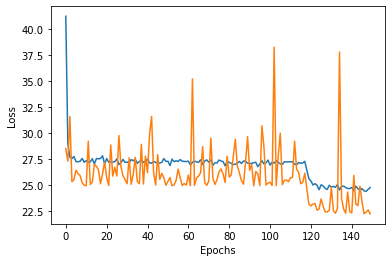

In [ ]:
plt.plot(model.history['loss'])
plt.plot(model.history['val_loss'])
plt.xlabel("Epochs")
plt.ylabel("Loss")